In [128]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [129]:
!pip install scikit-learn

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error , mean_absolute_error, r2_score
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings ('ignore')
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [130]:
nRowsRead = 1259

df1 = pd.read_csv('MagicBricks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MagicBricks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns


In [131]:
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [132]:
df1.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [133]:
df1.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [135]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1254,False
1255,False
1256,False
1257,False


In [136]:
df1.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Price,0
Status,0
Transaction,0
Type,5


In [137]:
df1.drop('Per_Sqft',axis=1,inplace=True)

In [138]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

In [139]:
df1.Parking.fillna(0,inplace=True)

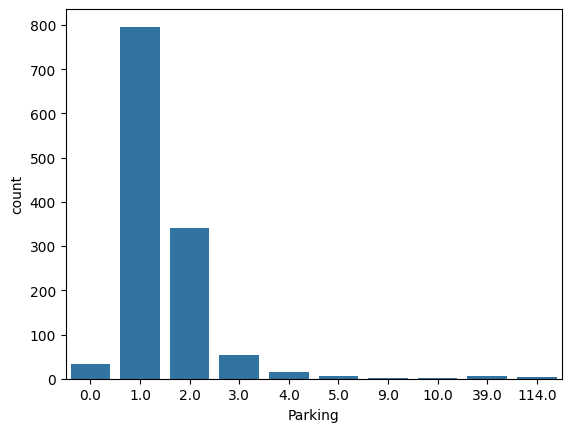

In [140]:
sns.countplot(x ='Parking', data = df1)
plt.show()

In [141]:
df1.drop(df1[df1.Parking > 10].index, inplace=True)

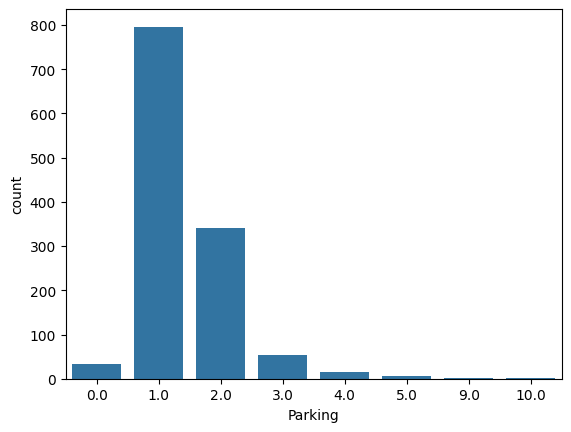

In [142]:
sns.countplot(x ='Parking', data = df1)
plt.show()

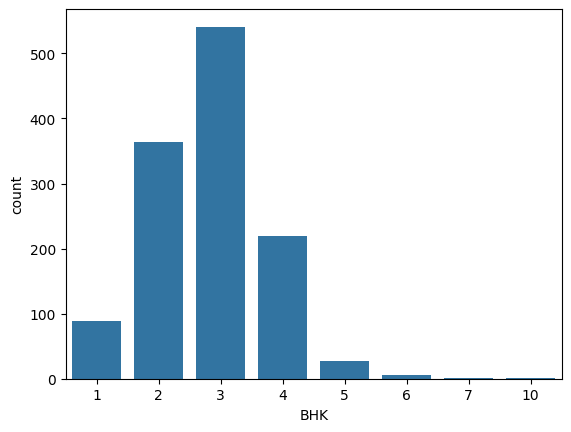

In [143]:
sns.countplot(x='BHK',data=df1)
plt.show()

In [144]:
df1['BHK'].value_counts()

,count
BHK,
3,541
2,364
4,220
1,89
5,27
6,6
7,1
10,1


In [145]:
df1.drop(df1[df1.BHK > 5].index, inplace=True)

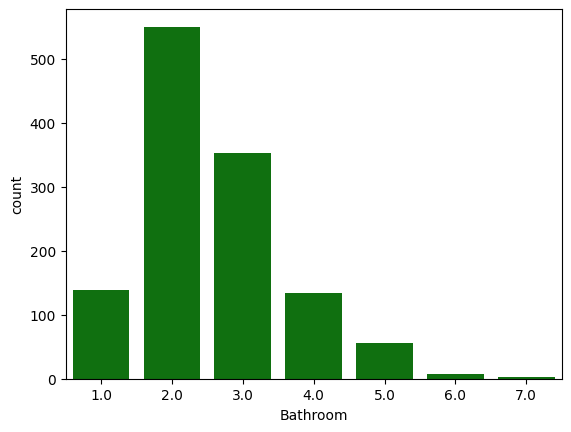

In [146]:
sns.countplot(x='Bathroom',data=df1,color='g')
plt.show()

In [147]:
df1.drop(df1[df1.Bathroom > 5].index, inplace=True)

<Axes: xlabel='Furnishing'>

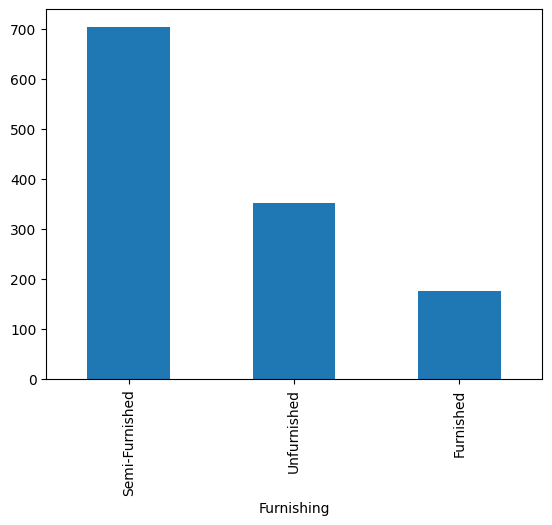

In [148]:
df1.Furnishing.value_counts().plot.bar()

<Axes: xlabel='Furnishing', ylabel='Price'>

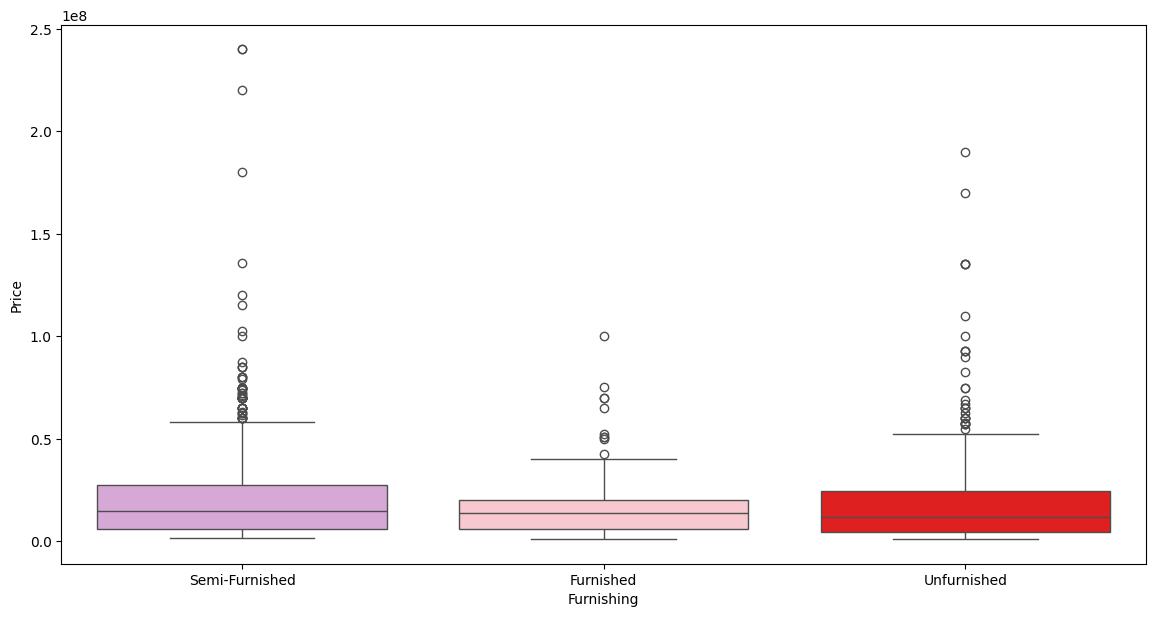

In [149]:
plt.figure(figsize=(14,7))
palette=['plum','pink','r']
sns.boxplot(x=df1.Furnishing,y=df1.Price,palette=palette)

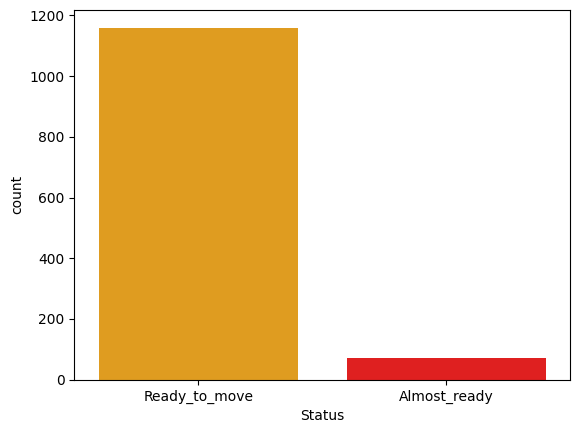

In [150]:
palette=['orange','r']
sns.countplot(x='Status',data=df1,palette=palette)
plt.show()

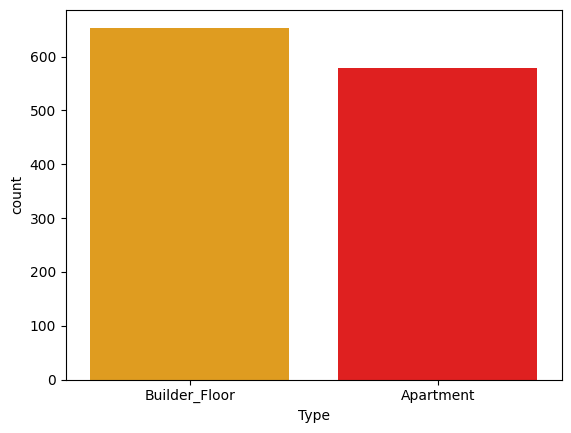

In [151]:
palette=['orange','r']
sns.countplot(x='Type',data=df1,palette=palette)
plt.show()

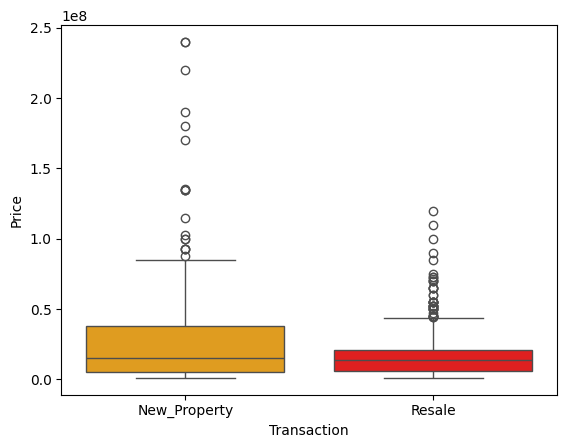

In [152]:
palette=['orange','r']
sns.boxplot(x='Transaction',y='Price',data=df1,palette=palette)
plt.show()

<Axes: xlabel='Area', ylabel='Price'>

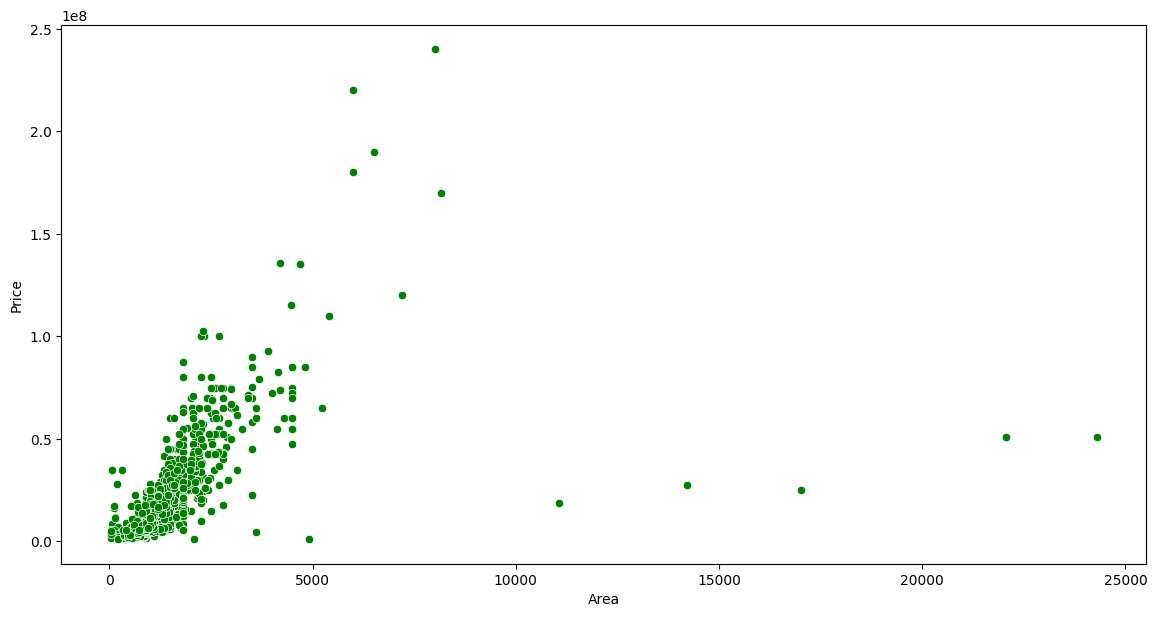

In [153]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Area',y='Price',data=df1,color='g')

In [154]:
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [155]:
df1 = pd.get_dummies(df1)

In [156]:
for col in df1.columns:
    if df1[col].dtype != bool:
        m = max(df1[col])
        df1[col] = df1[col]/m

In [157]:
df1

,Area,BHK,Bathroom,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.4,0.1,0.027083,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,0.030864,0.4,0.4,0.1,0.020833,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0.039095,0.4,0.4,0.1,0.064583,True,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.4,0.1,0.017500,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,0.026749,0.4,0.4,0.1,0.025833,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,1.0,0.3,0.229167,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True
1255,0.043210,0.6,0.4,0.3,0.052083,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1256,0.036008,0.6,0.6,0.3,0.072917,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1257,0.040741,0.4,0.4,0.1,0.047917,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [158]:
df1.corr()

,Area,BHK,Bathroom,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
Area,1.000000,0.454176,0.515750,0.221672,0.560270,-0.054293,0.073891,-0.038888,0.032839,0.005847,...,-0.003833,-0.043613,-0.016780,-0.019372,0.144425,-0.144425,0.109436,-0.109436,-0.100257,0.100257
BHK,0.454176,1.000000,0.778803,0.256526,0.597242,0.009421,0.091935,-0.108008,0.056431,0.018340,...,-0.035288,-0.032154,-0.024942,-0.024942,0.116473,-0.116473,0.166357,-0.166357,-0.112390,0.112390
Bathroom,0.515750,0.778803,1.000000,0.345901,0.715335,-0.075218,0.114484,-0.067147,0.019390,-0.025701,...,-0.021656,-0.090350,-0.044318,-0.015307,0.123321,-0.123321,0.208277,-0.208277,-0.158855,0.158855
Parking,0.221672,0.256526,0.345901,1.000000,0.347187,0.019462,0.006881,-0.022613,-0.020603,-0.035743,...,-0.020603,-0.046178,0.021829,-0.014562,-0.003586,0.003586,0.052300,-0.052300,-0.079524,0.079524
Price,0.560270,0.597242,0.715335,0.347187,1.000000,-0.067872,0.070580,-0.024743,0.065552,-0.016579,...,-0.009640,-0.035570,-0.022758,-0.013900,0.158916,-0.158916,0.214590,-0.214590,-0.129803,0.129803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Status_Ready_to_move,-0.144425,-0.116473,-0.123321,0.003586,-0.158916,0.002825,0.056936,-0.064559,0.010046,0.017429,...,0.010046,0.036581,0.007101,0.007101,-1.000000,1.000000,-0.252594,0.252594,-0.036199,0.036199
Transaction_New_Property,0.109436,0.166357,0.208277,0.052300,0.214590,-0.135016,0.148028,-0.057574,0.051256,-0.055036,...,-0.031723,-0.069029,-0.022423,-0.022423,0.252594,-0.252594,1.000000,-1.000000,-0.234197,0.234197
Transaction_Resale,-0.109436,-0.166357,-0.208277,-0.052300,-0.214590,0.135016,-0.148028,0.057574,-0.051256,0.055036,...,0.031723,0.069029,0.022423,0.022423,-0.252594,0.252594,-1.000000,1.000000,0.234197,-0.234197
Type_Apartment,-0.100257,-0.112390,-0.158855,-0.079524,-0.129803,0.090305,-0.102825,0.042690,-0.037909,0.074414,...,0.042893,-0.081454,-0.026795,-0.026795,0.036199,-0.036199,-0.234197,0.234197,1.000000,-1.000000


In [159]:
df1.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Bathroom,0.715335
BHK,0.597242
Area,0.560270
Parking,0.347187
...,...
Locality_Laxmi Nagar,-0.091943
Locality_Mehrauli,-0.094574
Type_Apartment,-0.129803
Status_Ready_to_move,-0.158916


In [160]:
Y = df1.Price
X = df1.drop('Price',axis=1)

In [161]:
X

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka","Locality_Abhimanyu Apartments, Vasundhara Enclave",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.4,0.1,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,0.030864,0.4,0.4,0.1,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0.039095,0.4,0.4,0.1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.4,0.1,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,0.026749,0.4,0.4,0.1,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,1.0,0.3,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1255,0.043210,0.6,0.4,0.3,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1256,0.036008,0.6,0.6,0.3,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1257,0.040741,0.4,0.4,0.1,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [162]:
Y

,Price
0,0.027083
1,0.020833
2,0.064583
3,0.017500
4,0.025833
...,...
1254,0.229167
1255,0.052083
1256,0.072917
1257,0.047917


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [177]:
X_train

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka","Locality_Abhimanyu Apartments, Vasundhara Enclave",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1095,0.055556,0.6,0.6,0.2,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,True,False
920,0.046296,0.4,0.4,0.2,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
433,0.039095,0.4,0.4,0.2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1255,0.043210,0.6,0.4,0.3,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
826,0.055556,0.6,0.6,0.1,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.115226,0.8,1.0,0.2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1121,0.032922,0.4,0.4,0.2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1156,0.057613,0.4,0.4,0.2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
882,0.015597,0.2,0.2,0.1,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [178]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [179]:
print(f'Training Accuracy: {lr.score(X_train,y_train)}')
print(f'Testing Accuracy: {lr.score(X_test,y_test)}')

Training Accuracy: 0.8365032553559861
Testing Accuracy: -2.798381708964436e+24


In [180]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [181]:
print(f'Training Accuracy:{gb.score(X_train,y_train)}')
print(f'Test Accuracy:{gb.score(X_test,y_test)}')

Training Accuracy:0.9394393572461135
Test Accuracy:0.8379586933664191


In [182]:
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
print(f'Training Accuracy:{XGB.score(X_train,y_train)}')
print(f'Test Accuracy:{XGB.score(X_test,y_test)}')

Training Accuracy:0.9855987409810306
Test Accuracy:0.8547457324383286


In [184]:
Y_pred_train = gb.predict(X_train)
Y_pred_test = gb.predict(X_test)

In [201]:
def training_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)


    print (f'MSE = {mse}')

    print (f'RMSE = {rmse}')
    print (f'MAE = {mae}')
    print (f'Accuracy = {r2}')

    plt.scatter(actual,predicted , color = 'r')
    plt.plot([actual.min() , actual.max()],[actual.min() , actual.max()] ,color = 'k' , lw = 2 , ls = '--')



    plt.title('Scatter Plot of Y_test vs Y_pred_train')
    plt.xlabel('Actual Values (Y_train)')
    plt.ylabel('Predicted Values (Y_pred_train)')
    plt.show()



MSE = 0.0006008270850005533
RMSE = 0.024511774415585528
MAE = 0.01760519626396524
Accuracy = 0.9394393572461135


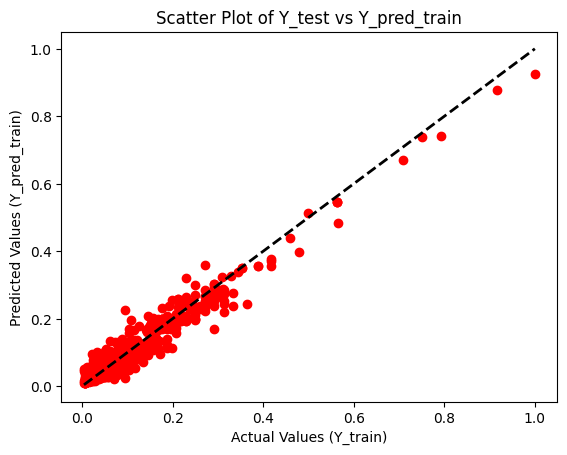

In [202]:
training_evaluation(y_train,Y_pred_train)

In [189]:
def test_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)


    print (f'MSE = {mse}')

    print (f'RMSE = {rmse}')
    print (f'MAE = {mae}')
    print (f'Accuracy = {r2}')

    plt.scatter(actual,predicted , color = 'g')
    plt.plot( [actual.min() , actual.max()],[actual.min() , actual.max()] ,color = 'k' , lw = 2 , ls = '--' )

    plt.title('Scatter Plot of y_test vs y_pred_test')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred_test)')
    plt.show()

MSE = 0.001752972170314266
RMSE = 0.041868510485975806
MAE = 0.02688718087748336
Accuracy = 0.8379586933664191


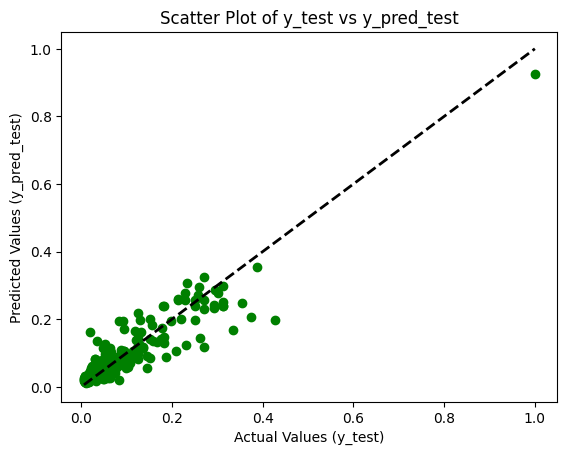

In [190]:
test_evaluation(y_test,Y_pred_test)